In [8]:
"""
main code page
structure (xpdf_process):
1. Read pdfs from input folder
2. Figure and caption pair detection
    2.1. graphical content detection
    2.2 page segmentation
    2.3 figure detetion
    2.4 caption association

3. Mess up pdf processing


Writen by Pengyuan Li

Start from 19/10/2017
1.0 version 28/02/2018

"""

import os
import json
from pprint import pprint
import renderer
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from xpdf_process import figures_captions_list
import subprocess
import os
import time

In [10]:
pdf2images

NameError: name 'pdf2images' is not defined

In [4]:
import requests
from PIL import Image
import fitz  # PyMuPDF
import io
import re
from PyPDF2 import PdfReader

def download_pdf(url):
    response = requests.get(url)
    if response.status_code == 200:
        return io.BytesIO(response.content)
    else:
        raise Exception("Failed to download PDF from the provided URL.")

In [ ]:
def render_pdf(filepath: str) -> List[Image.Image]:
    """ Transforms PDF to images and return them as an array. Intermediate
        images are deleted from OS.
    """
    # save images to temp directory
    temp_output_dir = tempfile.mkdtemp()
    pdf2images(filepath, temp_output_dir)

    # load images to memory
    img_paths = [
        join(temp_output_dir, filename)
        for filename in listdir(temp_output_dir)
        if isfile(join(temp_output_dir, filename))
        and not filename.startswith('.') and filename.endswith('.png')
    ]
    img_paths = natural_sort(img_paths)
    print("image path list length = " +str(len(img_paths)))
    images = []
    print("initialised the image cvariable with length " + str(len(images)))
    for img_path in img_paths:
        page_image = Image.open(img_path).convert('RGB')
        # load into memory and close associated file
        page_image.load()
        images.append(page_image)

    # clean directory
    rmtree(temp_output_dir)

    return images


# utilities

In [15]:
""" Utility functions invoking system packages to process PDFs """

from re import split as re_split
from os import system
from os.path import join
from subprocess import check_output
from numpy import empty_like, dot, array
from typing import List, Tuple
from pathlib import Path
from selenium import webdriver
from html_content import HtmlPage, TextLine, CountTuple


def natural_sort(arr: List[str]) -> List[str]:
    """ Sorts list in ascending order considering numpad for numbers """
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re_split('([0-9]+)', key)]
    return sorted(arr, key=alphanum_key)


def pdf2images(file_path: str, output_path: str, dpi=500) -> None:
    """ convert PDF to images and save them on output location """
    gs_cmd = f"gs -q -sDEVICE=png16m \
        -o {join(output_path, 'file-%02d.png')} -r{dpi} {file_path}"

    # TODO: how to capture an error from the ghostscript command?
    system(gs_cmd)

In [17]:
import requests
import tempfile
from os import listdir
from os.path import isfile, join
import os
import shutil  # Corrected import for rmtree
from PIL import Image
from typing import List  # Added for type hinting

def download_pdf(url: str, filepath: str):
    """ Download a PDF from a given URL and save it to a specified filepath. """
    response = requests.get(url)
    if response.status_code == 200:
        with open(filepath, 'wb') as f:
            f.write(response.content)
    else:
        raise Exception(f"Failed to download PDF from the provided URL. Status code: {response.status_code}")

def render_pdf_from_url(url: str) -> List[Image.Image]:
    """ Transforms PDF to images from a given URL and returns them as an array. 
        Intermediate images are deleted from OS.
    """
    # Download the PDF to a temporary file
    temp_pdf_path = tempfile.mktemp(suffix='.pdf')
    download_pdf(url, temp_pdf_path)

    # Convert the PDF to images
    images = render_pdf(temp_pdf_path)

    # Remove the temporary PDF file
    os.remove(temp_pdf_path)

    return images

def render_pdf(filepath: str) -> List[Image.Image]:
    """ Transforms PDF to images and returns them as an array. Intermediate
        images are deleted from OS.
    """
    # save images to temp directory
    temp_output_dir = tempfile.mkdtemp()
    pdf2images(filepath, temp_output_dir)  # Assuming pdf2images is defined elsewhere

    # load images to memory
    img_paths = [
        join(temp_output_dir, filename)
        for filename in listdir(temp_output_dir)
        if isfile(join(temp_output_dir, filename))
        and not filename.startswith('.') and filename.endswith('.png')
    ]
    img_paths = natural_sort(img_paths)  # Assuming natural_sort is defined elsewhere
    images = []
    for img_path in img_paths:
        page_image = Image.open(img_path).convert('RGB')
        # load into memory and close associated file
        page_image.load()
        images.append(page_image)

    # clean directory
    shutil.rmtree(temp_output_dir)

    return images

# Example usage
# url = "<YOUR_PDF_URL_HERE>"
url = 'https://arxiv.org/pdf/2401.07099v1.pdf'
images_from_pdf = render_pdf_from_url(url)


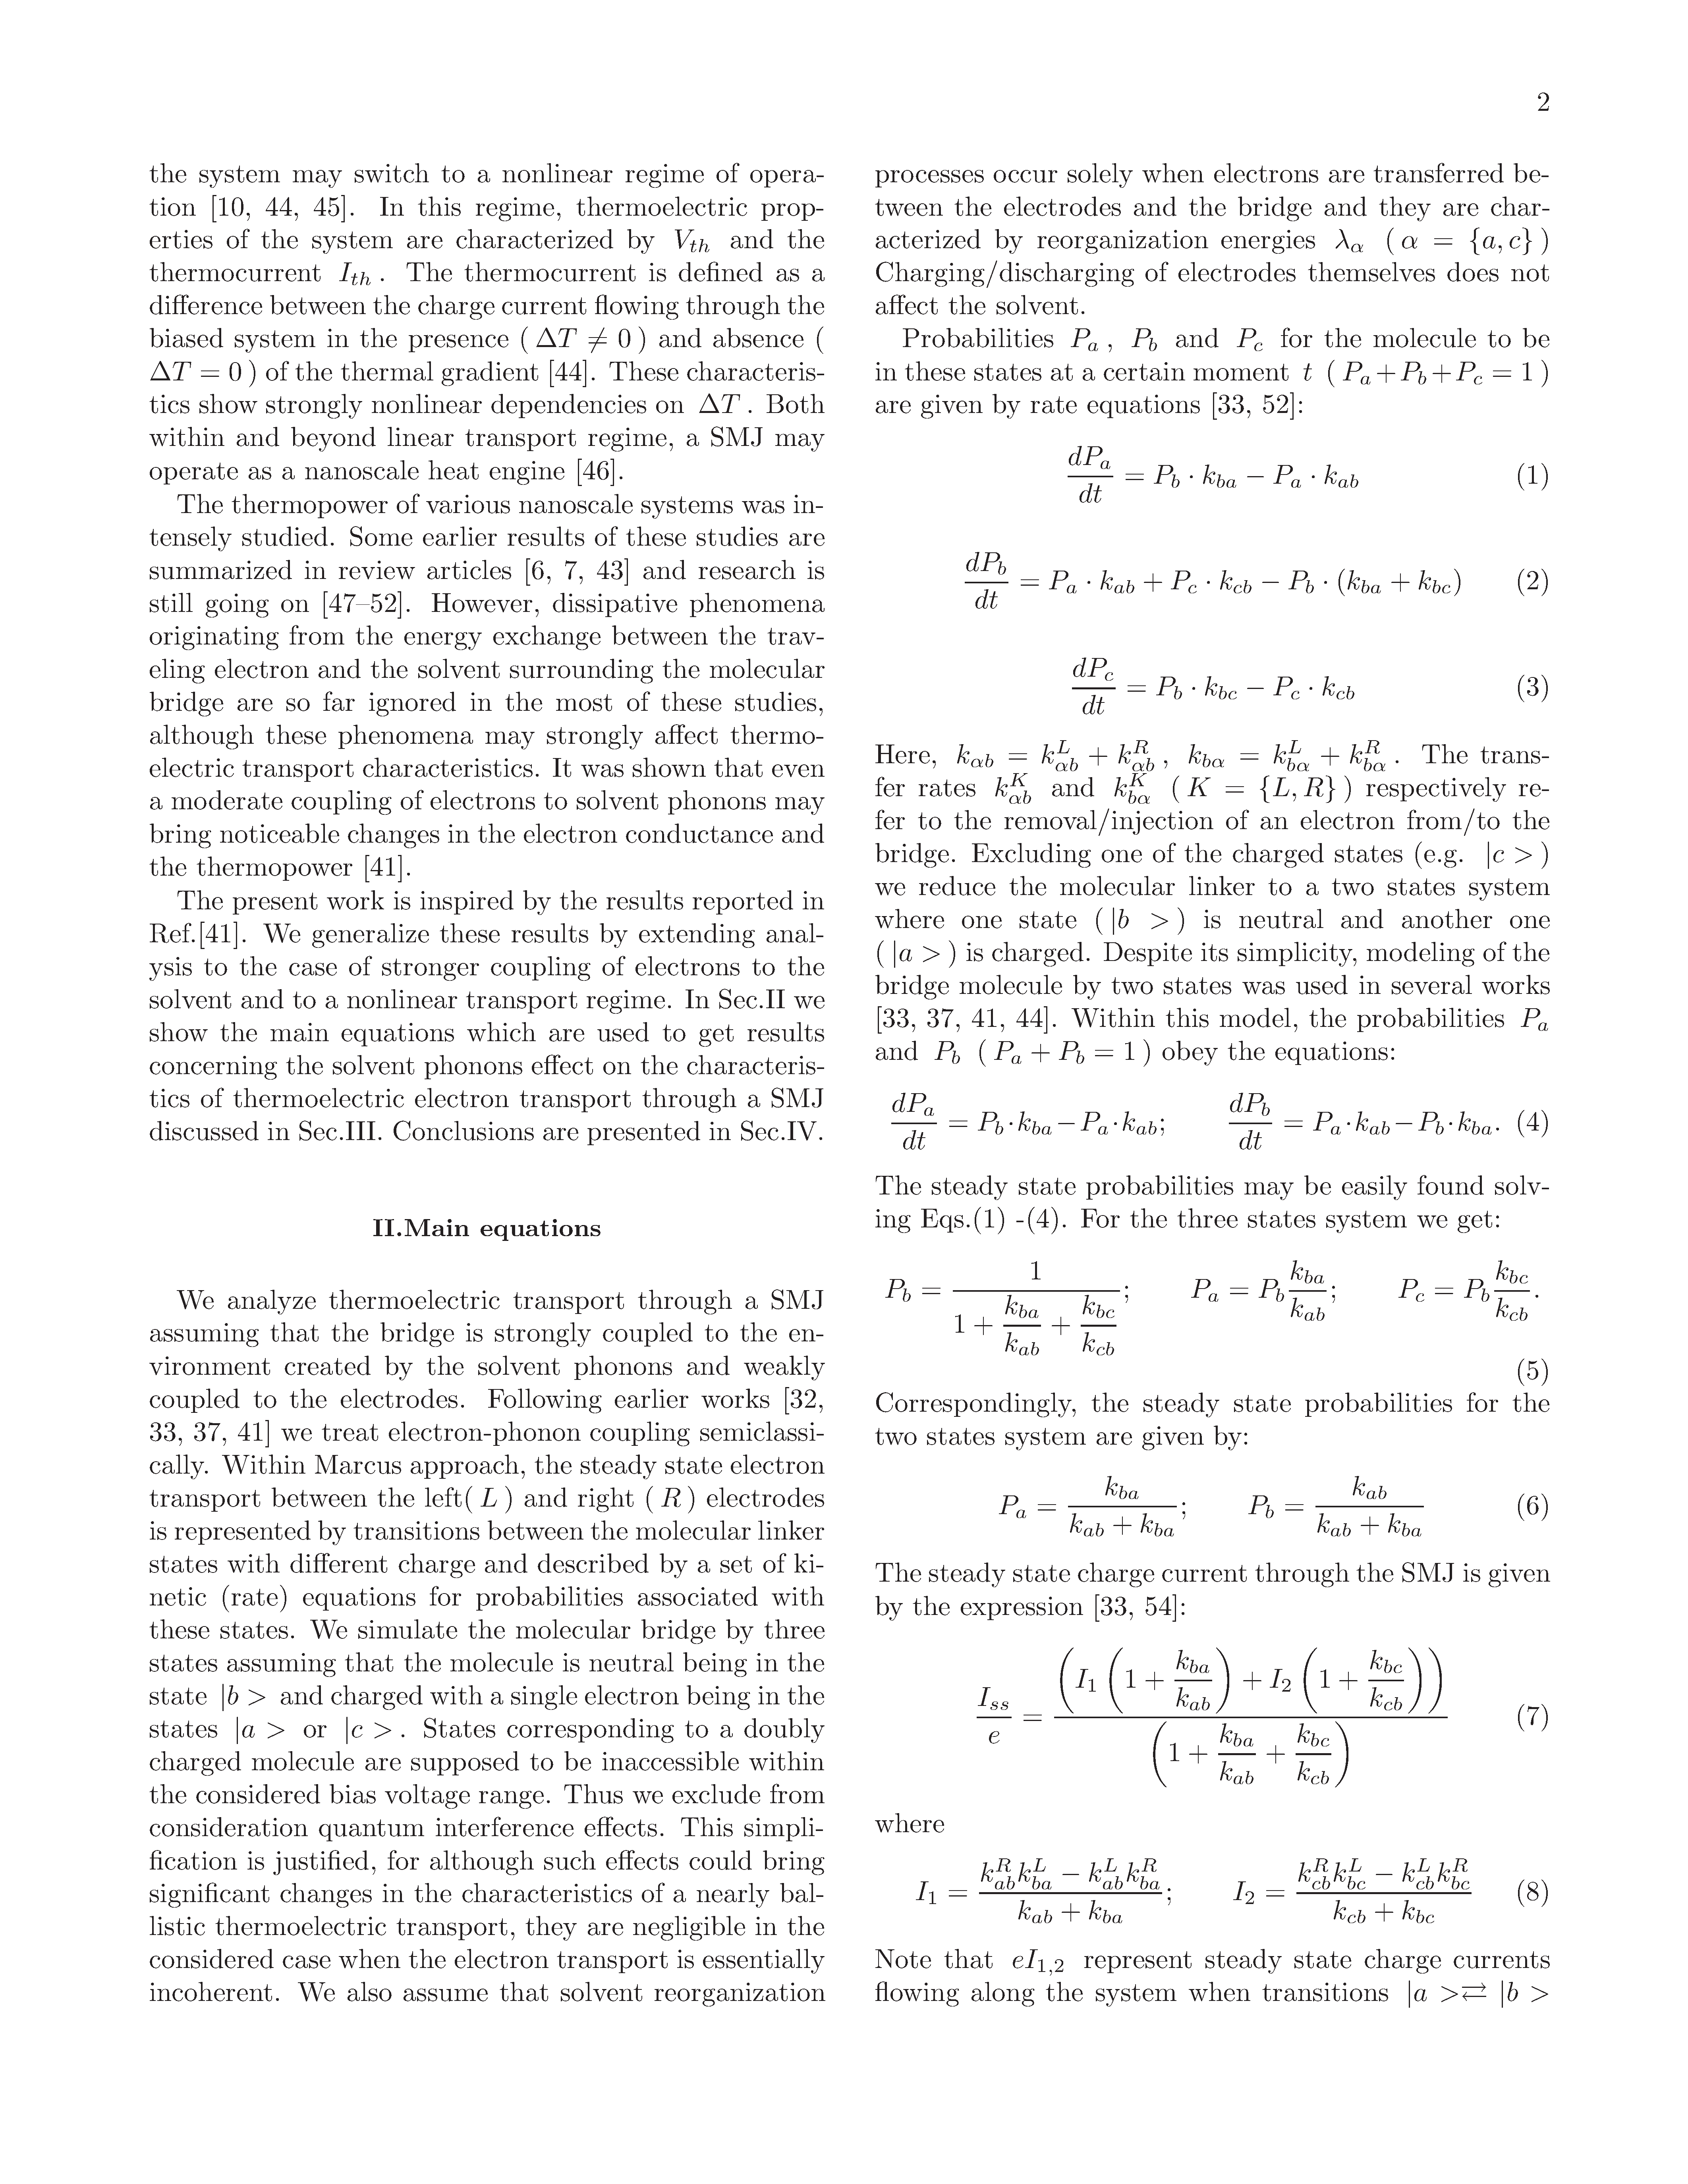

In [20]:
images_from_pdf[1]

In [13]:
url = "https://arxiv.org/pdf/2202.10516.pdf"

In [5]:
file = download_pdf("https://arxiv.org/pdf/2202.10516.pdf")

In [9]:
images = renderer.render_pdf(file)

image path list length = 0
initialised the image cvariable with length 0


sh: -c: line 0: syntax error near unexpected token `newline'
sh: -c: line 0: `gs -q -sDEVICE=png16m         -o /var/folders/p9/9f6ptzv130v20j_2jyk486280000gn/T/tmps1569_li/file-%02d.png -r500 <_io.BytesIO object at 0x123783790>'


In [6]:
file.

In [2]:
input_path = '/workspaces/PDFigCapX-TheXmassheep/input-pdf/'
output_path = '/workspaces/PDFigCapX-TheXmassheep/output-pdf/'
xpdf_path = output_path + 'xpdf/'
print("XPDF path \n" + xpdf_path)
log_file = output_path + 'log.text' # changed the last part of this line from '/log.text' to 'log.text'
log_file = 'test.text'
f_log = open(log_file, 'w')
if not os.path.isdir(xpdf_path):
    os.mkdir(xpdf_path)
    print("MADE XPDF PATH")

XPDF path 
/workspaces/PDFigCapX-TheXmassheep/output-pdf/xpdf/


FileNotFoundError: [Errno 2] No such file or directory: '/workspaces/PDFigCapX-TheXmassheep/output-pdf/xpdf/'

In [ ]:


if __name__ == "__main__":

    input_path = '/workspaces/PDFigCapX-TheXmassheep/input-pdf/'
    output_path = '/workspaces/PDFigCapX-TheXmassheep/output-pdf/'
    xpdf_path = output_path + 'xpdf/'
    print("XPDF path \n" + xpdf_path)
    log_file = output_path + 'log.text' # changed the last part of this line from '/log.text' to 'log.text'
    log_file = 'test.text'
    f_log = open(log_file, 'w')
    if not os.path.isdir(xpdf_path):
        os.mkdir(xpdf_path)
        print("MADE XPDF PATH")
# Read each files in the input path
    for pdf in os.listdir(input_path):
        print("STARTED FILE LOOP")
        if pdf.endswith('.pdf') and (not pdf.startswith('._')):
            data = {}
            print(input_path + pdf)
            images = renderer.render_pdf(input_path + '/' + pdf)
            print("images being set here")
            data[pdf] = {}
            data[pdf]['figures'] = []
            data[pdf]['pages_annotated'] = []
            pdf_flag = 0
            print("worked until here")
            try:
                if not os.path.isdir(xpdf_path + pdf[:-4]):
                    print("if statement triggered")
                    # print(str(os.path(xpdf_path + pdf[:-4])))
                    print()
                    std_out = subprocess.check_output(
                        ["exectuables/pdftohtml", input_path + '/' + pdf, xpdf_path + pdf[:-4] + '/'])

            except:
                print("\nWrong " + pdf + "\n")
                f_log.write(pdf + '\n')
                pdf_flag = 1
            

            
            print("FuN TIMES")
            if pdf_flag == 0:
                flag = 0
                wrong_count = 0
                while flag == 0 and wrong_count < 5:
                    print(input_path)
                    print(pdf)
                    try:
                        figures, info = figures_captions_list(
                            input_path, pdf, xpdf_path)
                        flag = 1
                        print("INFO: " + str(info))

                    except:
                        wrong_count = wrong_count + 1
                        time.sleep(5)
                        print(pdf)
                        info['fig_no_est'] = 0
                        figures = []
                        print("------\nChrome Error\n----------\n")

                data[pdf]['fig_no'] = info['fig_no_est']

                output_file_path = output_path + '/' + pdf[:-4]
                if not os.path.isdir(output_file_path):
                    os.mkdir(output_file_path)

                print("HELLO THERE")
                print("length image list == " + str(len(images)))
                for figure in figures:
                    print("FIGURE " + figure)
                    page_no = int(figure[:-4][4:])
                    print("PAGE NO = "  + str(page_no))
                    page_fig = images[page_no - 1]
                    rendered_size = page_fig.size

                    bboxes = figures[figure]
                    order_no = 0
                    for bbox in bboxes:
                        order_no = order_no + 1
                        png_ratio = float(
                            rendered_size[1]) / info['page_height']
                        print(png_ratio)

                        if len(bbox[1]) > 0:
                            data[pdf]['figures'].append({'page': page_no,
                                                         'region_bb': bbox[0],
                                                         'figure_type': 'Figure',
                                                         'page_width': info['page_width'],
                                                         'page_height': info['page_height'],
                                                         'caption_bb': bbox[1][0],
                                                         'caption_text': bbox[1][1]
                                                         })
                            with open(output_file_path + '/' + str(page_no) + '_' + str(order_no) + '.txt', 'w') as capoutput:
                                capoutput.write(str(bbox[1][1]))
                                capoutput.close
                        else:
                            data[pdf]['figures'].append({'page': page_no,
                                                         'region_bb': bbox[0],
                                                         'figure_type': 'Figure',
                                                         'page_width': info['page_width'],
                                                         'page_height': info['page_height'],
                                                         'caption_bb': [],
                                                         'caption_text': []
                                                         })
                        fig_extracted = page_fig.crop([int(bbox[0][0] * png_ratio), int(bbox[0][1] * png_ratio),
                                                       int((bbox[0][0] + bbox[0][2]) * png_ratio), int((bbox[0][1] + bbox[0][3]) * png_ratio)])
                        fig_extracted.save(
                            output_file_path + '/' + str(page_no) + '_' + str(order_no) + '.jpg')

                pprint(data)
                json_file = output_file_path + '/' + pdf[:-4] + '.json'
                with open(json_file, 'w') as outfile:
                    json.dump(data, outfile)
